In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from pystackreg import StackReg
from PIL import Image

In [2]:
ncore = mp.cpu_count()
ncore

48

In [50]:
# need to change
ipts="30890"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
scan_type = 'processed_data'
# scan_type = 'analysis'
####################################
##################################
scan_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/" + scan_type
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['2023_08_04_EXPT1_MELD',
 '2023_08_04_EXPT2_G1B_G5B',
 '2023_08_04_EXPT3_G4B_G2B',
 '2023_08_04_EXPT4_1B_1T',
 '2023_08_05_EXPT5_G3T_G3B',
 '2023_08_05_EXPT6_ALcubes',
 '2023_08_05_EXPT7_G2T_G4T',
 '2023_08_06_EXPT10_Silver_Behenate',
 '2023_08_06_EXPT8_G4B_G2B',
 '2023_08_06_EXPT9_3T_3B']

In [72]:
sample_name = "2023_08_06_EXPT8_G4B_G2B"
distance_to_G2_cm = 0.5
reverse = True
######################
wavelen_ang = 2.5
period_um = 56.5
name_pattern = ["TI_ACL", "DFI_ACL", "DPC_ACL"]
ref_name = name_pattern[0]
######################
######################
######################
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_dict = {}
for e_pa in name_pattern:
    _fname_list = rocku.filter_list(fname_list, e_pa)
    _fname_list.sort(reverse=reverse)
    fname_dict[e_pa] = _fname_list
pos_list = []
for each in fname_dict[name_pattern[0]]:
    _n = each.split('.')[0]
    _num = int(_n.split('_')[-1])
    pos_list.append(_num)
######################
fname_dict_out = {}
acl_list = []
pos_max = max(pos_list)
for e_pos in pos_list:
    _acl_nm = int(1000*wavelen_ang*((pos_max-e_pos)/10 + distance_to_G2_cm)/period_um)
    acl_list.append("{:04d}".format(_acl_nm) + "nm")
for e_pa in name_pattern:
    _fname_list_out = []
    for e_acl in acl_list:
        _fname_list_out.append("_".join([e_pa, e_acl]))
    fname_dict_out[e_pa] = _fname_list_out
for ea_pa in name_pattern:
    print(ea_pa)
    for m, ea_file in enumerate(fname_dict[ea_pa]):
        print("'{}' converted to '{}'".format(ea_file, fname_dict_out[ea_pa][m]))

TI_ACL
'TI_ACL_195.fits' converted to 'TI_ACL_0022nm'
'TI_ACL_185.fits' converted to 'TI_ACL_0066nm'
'TI_ACL_175.fits' converted to 'TI_ACL_0110nm'
'TI_ACL_165.fits' converted to 'TI_ACL_0154nm'
'TI_ACL_155.fits' converted to 'TI_ACL_0199nm'
'TI_ACL_145.fits' converted to 'TI_ACL_0243nm'
'TI_ACL_135.fits' converted to 'TI_ACL_0287nm'
'TI_ACL_125.fits' converted to 'TI_ACL_0331nm'
'TI_ACL_115.fits' converted to 'TI_ACL_0376nm'
'TI_ACL_105.fits' converted to 'TI_ACL_0420nm'
'TI_ACL_095.fits' converted to 'TI_ACL_0464nm'
'TI_ACL_085.fits' converted to 'TI_ACL_0508nm'
'TI_ACL_075.fits' converted to 'TI_ACL_0553nm'
'TI_ACL_065.fits' converted to 'TI_ACL_0597nm'
'TI_ACL_055.fits' converted to 'TI_ACL_0641nm'
'TI_ACL_045.fits' converted to 'TI_ACL_0685nm'
'TI_ACL_035.fits' converted to 'TI_ACL_0730nm'
'TI_ACL_025.fits' converted to 'TI_ACL_0774nm'
'TI_ACL_015.fits' converted to 'TI_ACL_0818nm'
'TI_ACL_005.fits' converted to 'TI_ACL_0862nm'
'TI_ACL_002.fits' converted to 'TI_ACL_0876nm'
DFI_AC

In [73]:
unreg_dict = {}
for e_pa in name_pattern:
    print("Loading {} ...".format(e_pa))
    _img_stack = rocku.read_img_stack(scan_dir, fname_dict[e_pa], flipud=True)
    unreg_dict[e_pa] = _img_stack.astype(np.float32)

Loading TI_ACL ...


21it [00:00, 21.27it/s]


Loading DFI_ACL ...


21it [00:00, 21.10it/s]


Loading DPC_ACL ...


21it [00:00, 22.08it/s]


Text(0.5, 1.0, 'np.min')

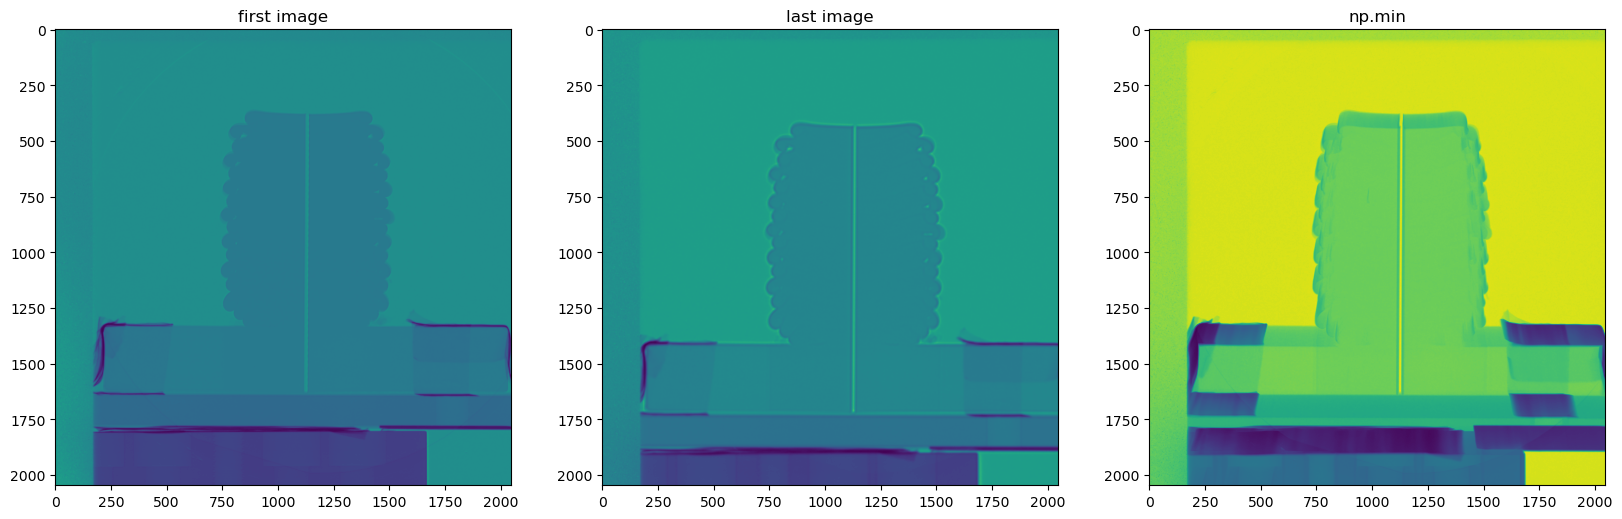

In [74]:
img_min = np.min(unreg_dict[name_pattern[0]], axis=0)

f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(unreg_dict[ref_name][0])
ax[0].set_title('first image')

ax[1].imshow(unreg_dict[ref_name][-1])
ax[1].set_title('last image')

ax[2].imshow(img_min)
ax[2].set_title('np.min')

Text(0.5, 1.0, 'np.min')

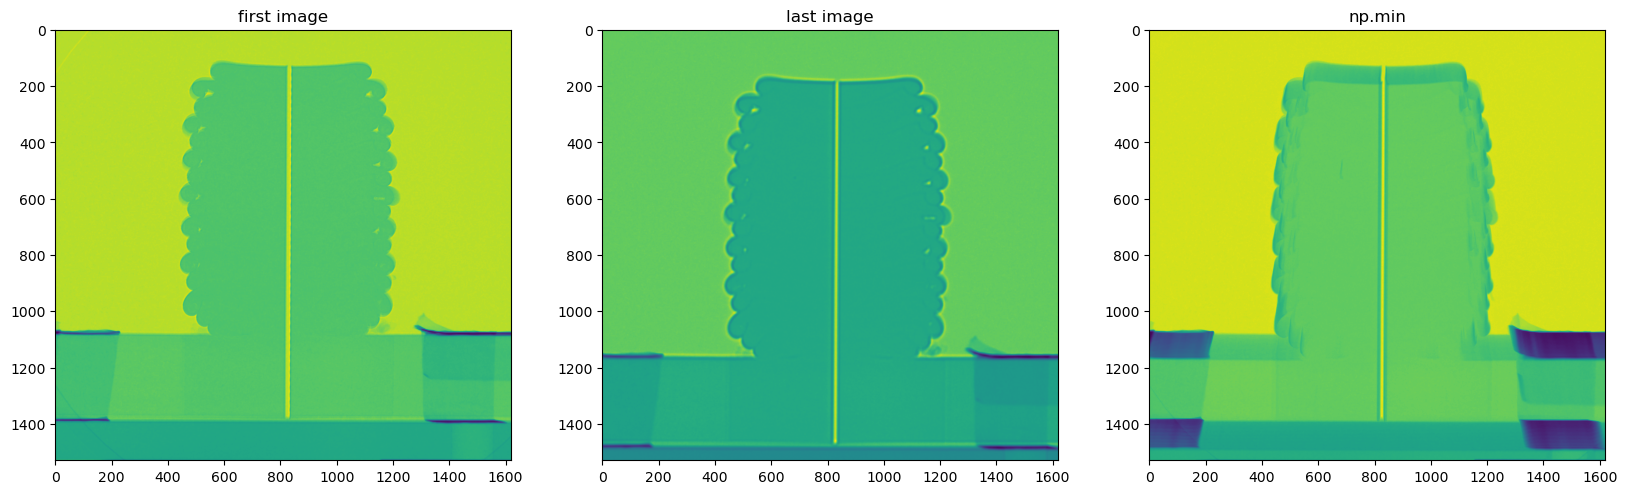

In [75]:
###################### need to change start
crop = True
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 300
crop_right = 1920
crop_top = 250
crop_bottom = 1780
###################### need to change end
# proj_crop = rocku.crop(proj_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# ob_crop = rocku.crop(ob_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
# dc_crop = rocku.crop(dc_raw, crop_left, crop_right, crop_top, crop_bottom, crop)
first_crop = rocku.crop(unreg_dict[ref_name][0], crop_left, crop_right, crop_top, crop_bottom, crop)
last_crop = rocku.crop(unreg_dict[ref_name][-1], crop_left, crop_right, crop_top, crop_bottom, crop)
img_min_crop = rocku.crop(img_min, crop_left, crop_right, crop_top, crop_bottom, crop)

f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(first_crop)
ax[0].set_title('first image')

ax[1].imshow(last_crop)
ax[1].set_title('last image')

ax[2].imshow(img_min_crop)
ax[2].set_title('np.min')

In [76]:
for ea_pa in name_pattern:
    unreg_dict[ea_pa] = rocku.crop(unreg_dict[ea_pa], crop_left, crop_right, crop_top, crop_bottom, crop)
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}

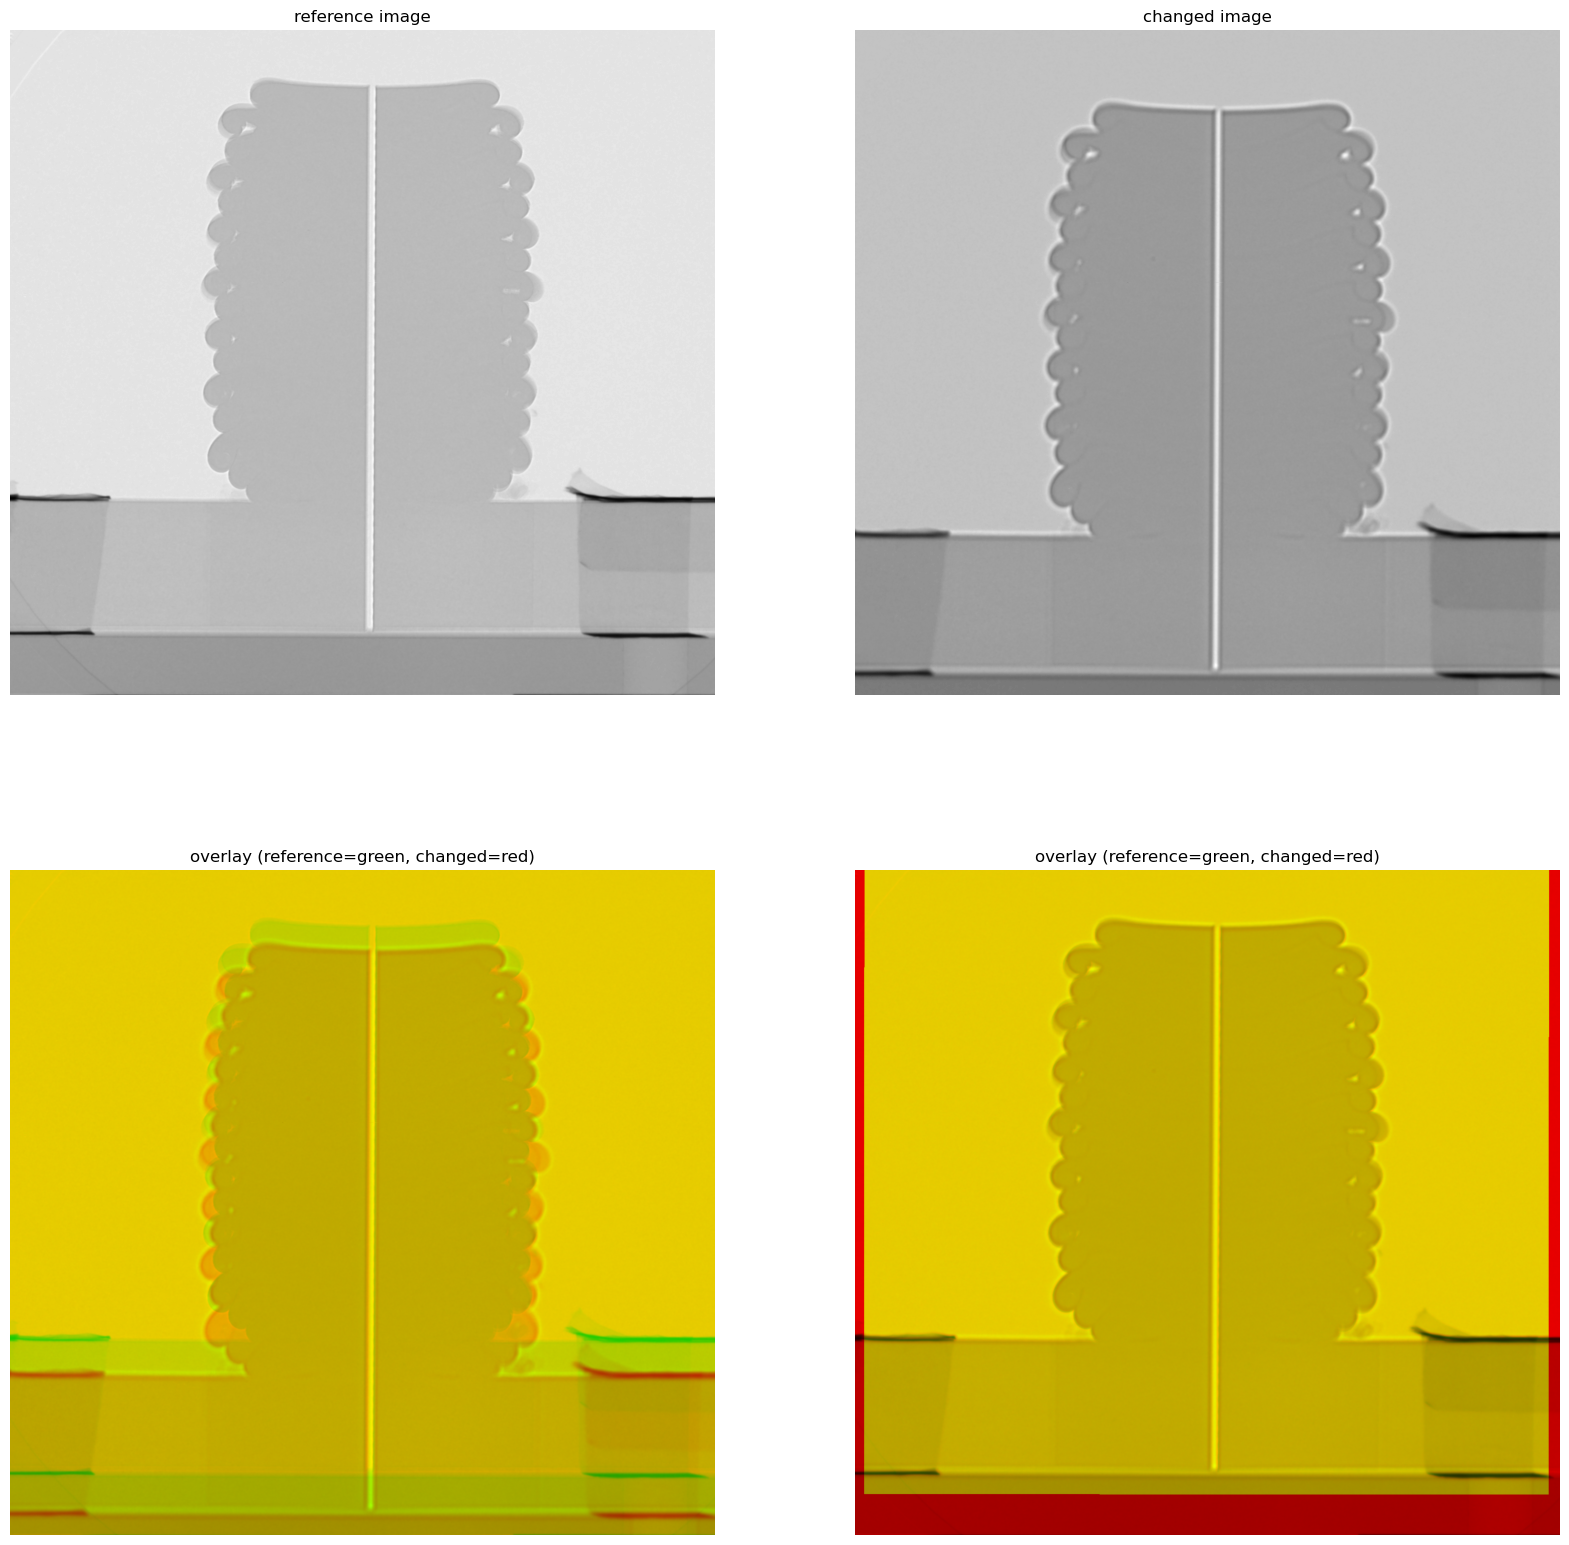

In [77]:
trans_algo = "SCALED_ROTATION"
#########################
#load reference and "moved" image
ref = unreg_dict[ref_name][0]
mov = unreg_dict[ref_name][-1]
#########################
sr = StackReg(trans_algo_dict[trans_algo])
reg = sr.register_transform(ref, mov)
reg = reg.clip(min=0)
after_reg = rocku.composite_images([ref, reg])
before_reg = rocku.composite_images([ref, mov])

f, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0][0].imshow(ref, cmap='gray')
ax[0][0].set_title('reference image')
ax[0][0].axis('off')

ax[0][1].imshow(mov, cmap='gray')
ax[0][1].set_title('changed image')
ax[0][1].axis('off')

ax[1][0].imshow(before_reg)
ax[1][0].set_title('overlay (reference=green, changed=red)')
ax[1][0].axis('off');

ax[1][1].imshow(after_reg)
ax[1][1].set_title('overlay (reference=green, changed=red)')
ax[1][1].axis('off');

In [78]:
sr = StackReg(trans_algo_dict[trans_algo])
size = (unreg_dict[ref_name].shape[0], unreg_dict[ref_name].shape[1], unreg_dict[ref_name].shape[2])
reg_dict = {}
for e_pa in name_pattern:
    reg_dict[e_pa] = np.empty(size, dtype=unreg_dict[e_pa].dtype)
    reg_dict[e_pa][0] = unreg_dict[e_pa][0][:]
for idx in range(size[0]):
    if idx != 0:
        print("Registering {}".format(fname_dict[ref_name][idx]))
        _reg = sr.register_transform(unreg_dict[ref_name][0], unreg_dict[ref_name][idx])
        _reg = _reg.clip(min=0)
        reg_dict[ref_name][idx] = _reg[:]
        for ee in name_pattern:
            if ee != ref_name:
                print("Apply transform to {}".format(fname_dict[ee][idx]))
                _reg_trans = sr.transform(unreg_dict[ee][idx])
                reg_dict[ee][idx] = _reg_trans[:]

Registering TI_ACL_185.fits
Apply transform to DFI_ACL_185.fits
Apply transform to DPC_ACL_185.fits
Registering TI_ACL_175.fits
Apply transform to DFI_ACL_175.fits
Apply transform to DPC_ACL_175.fits
Registering TI_ACL_165.fits
Apply transform to DFI_ACL_165.fits
Apply transform to DPC_ACL_165.fits
Registering TI_ACL_155.fits
Apply transform to DFI_ACL_155.fits
Apply transform to DPC_ACL_155.fits
Registering TI_ACL_145.fits
Apply transform to DFI_ACL_145.fits
Apply transform to DPC_ACL_145.fits
Registering TI_ACL_135.fits
Apply transform to DFI_ACL_135.fits
Apply transform to DPC_ACL_135.fits
Registering TI_ACL_125.fits
Apply transform to DFI_ACL_125.fits
Apply transform to DPC_ACL_125.fits
Registering TI_ACL_115.fits
Apply transform to DFI_ACL_115.fits
Apply transform to DPC_ACL_115.fits
Registering TI_ACL_105.fits
Apply transform to DFI_ACL_105.fits
Apply transform to DPC_ACL_105.fits
Registering TI_ACL_095.fits
Apply transform to DFI_ACL_095.fits
Apply transform to DPC_ACL_095.fits


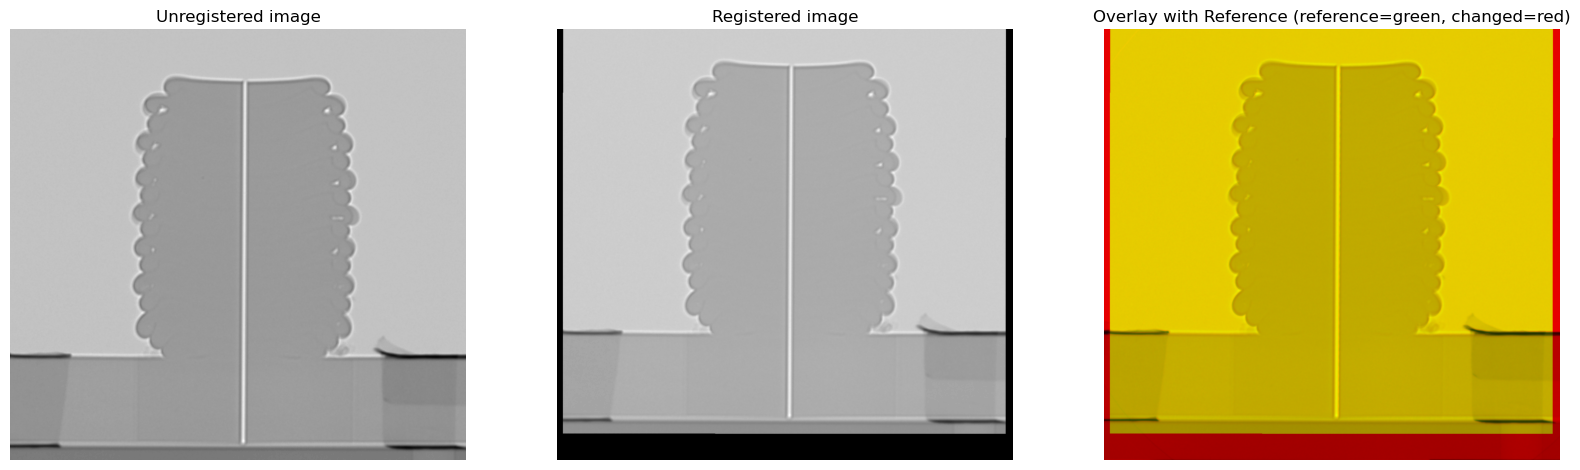

In [79]:
img_idx = -1
img_name = name_pattern[0]
#########################
f, ax = plt.subplots(1, 3, figsize=(20, 9))
check_reg =  rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(unreg_dict[img_name][img_idx], cmap='gray')
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], cmap='gray')
ax[1].set_title('Registered image')
ax[1].axis('off')

ax[2].imshow(check_reg)
ax[2].set_title('Overlay with Reference (reference=green, changed=red)')
ax[2].axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


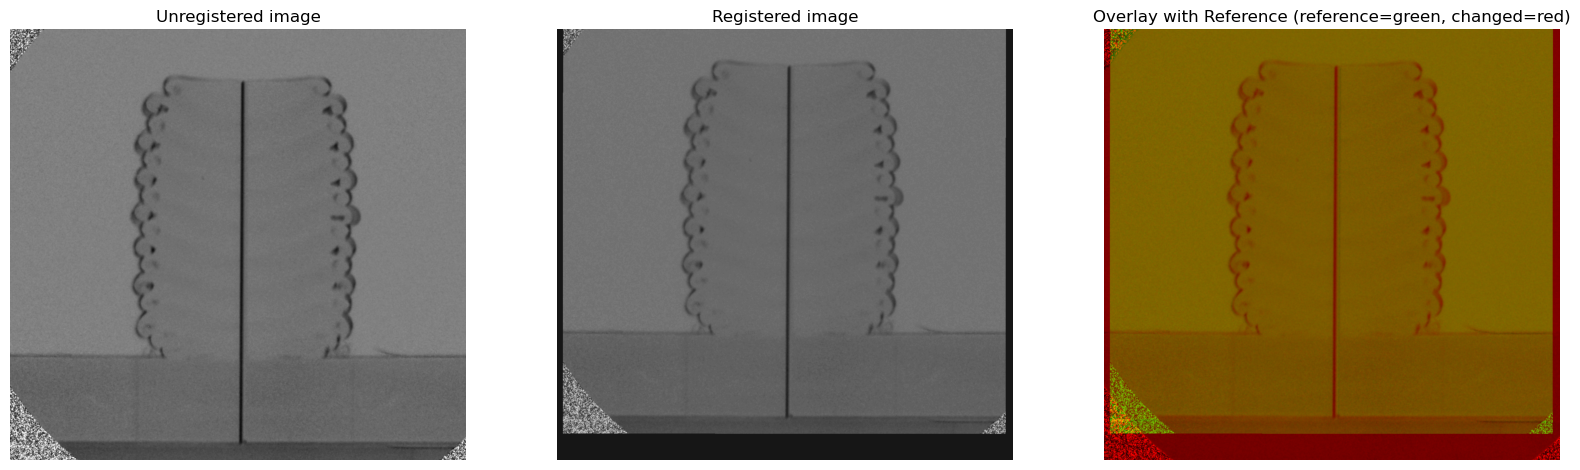

In [80]:
img_idx = -1
img_name = name_pattern[1]
#########################
f, ax = plt.subplots(1, 3, figsize=(20, 9))
check_reg = rocku.composite_images([reg_dict[img_name][0], reg_dict[img_name][img_idx]])

ax[0].imshow(unreg_dict[img_name][img_idx], cmap='gray')
ax[0].set_title('Unregistered image')
ax[0].axis('off')

ax[1].imshow(reg_dict[img_name][img_idx], cmap='gray')
ax[1].set_title('Registered image')
ax[1].axis('off')

ax[2].imshow(check_reg)
ax[2].set_title('Overlay with Reference (reference=green, changed=red)')
ax[2].axis('off');

# Save files

In [82]:
################ change save path for your own
save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/analysis/" + sample_name + "_" + trans_algo# + '_redo'
if not os.path.exists(save_to):
    os.mkdir(save_to)
for each in name_pattern:
    for i, e_name in enumerate(fname_dict_out[each]):
        fname = save_to + "/" + e_name + ".tiff"
        print('Saving to {} ...'.format(fname))
        img_pl = Image.fromarray(reg_dict[each][i])
        img_pl.save(fname)

Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0022nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0066nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0110nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0154nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0199nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0243nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0287nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0331nm.tiff ...
Saving to /HFIR/CG1D/IPTS-30890/shared/analysis/2023_08_06_EXPT8_G4B_G2B_SCALED_ROTATION/TI_ACL_0376nm.t